In [ ]:
import numpy as np
import matplotlib.pyplot as plt

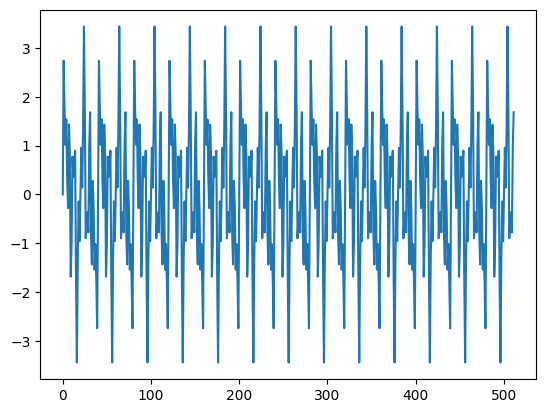

In [ ]:
#signal generation
F1 = 100
F2 = 200
F3 = 350
F4 = 600
Fs = 2000
SL = 2000

s = np.zeros(SL)
for n in range(SL):
    s[n] = np.sin(2*np.pi*F1*n/Fs)+np.sin(2*np.pi*F2*n/Fs)+np.sin(2*np.pi*F3*n/Fs)+np.sin(2*np.pi*F4*n/Fs)
plt.plot(s[0:512])

In [ ]:
# DFT

def DFT(x,N):
    X = np.zeros(N,dtype = 'complex_')
    for k in range(N):
        for n in range(N):
            X[k] = X[k] + x[n]*np.exp(-1j*2*np.pi*k*n/N)
    return X


In [ ]:
# IDFT
def IDFT(X, N):
    y = np.zeros(N,dtype = 'complex_')
    for n in range(N):
        for k in range(N):
            y[n] = y[n] + X[k]*np.exp(1j*2*np.pi*k*n/N)
    
    return y/N

In [ ]:
def overlapAdd(curLoc, y):
    sig[curLoc:curLoc+L] =  sig[curLoc:curLoc+L] + y[curLoc:curLoc+L]
    
    return sig

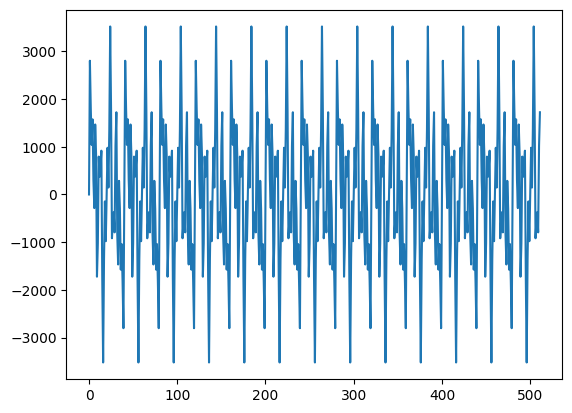

In [ ]:
h = [1]
sig = np.zeros(SL)
L=512
N=1024

for i in range(2):
    fStart = L*i
    x = s[fStart:fStart+L] #frame or segment
    x = np.pad(x, (0, N-len(x)), 'constant')
    X = DFT(x, N)
    h = np.pad(h, (0, N-len(h)), 'constant')
    H = DFT(h,N)
    y = np.real(IDFT(X*H, N))
    
    sig = overlapAdd(fStart,y)

plt.plot(sig[0:512])
    